<a href="https://colab.research.google.com/github/ashkash2476/DEEP-learning/blob/master/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import SeparableConv2D

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

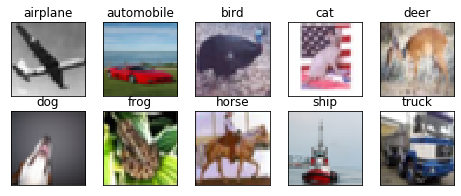

In [36]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [40]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [41]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_11 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 96)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50





390/390 [==============================] - 33s 84ms/step - loss: 2.1624 - acc: 0.1671 - val_loss: 1.7427 - val_acc: 0.3457
Epoch 2/50
390/390 [==============================] - 21s 53ms/step - loss: 1.5973 - acc: 0.4073 - val_loss: 1.3140 - val_acc: 0.5236
Epoch 3/50
390/390 [==============================] - 21s 53ms/step - loss: 1.3244 - acc: 0.5209 - val_loss: 1.1272 - val_acc: 0.5970
Epoch 4/50
390/390 [==============================] - 21s 53ms/step - loss: 1.1671 - acc: 0.5837 - val_loss: 1.0918 - val_acc: 0.6140
Epoch 5/50
390/390 [==============================] - 21s 53ms/step - loss: 1.0372 - acc: 0.6335 - val_loss: 0.9365 - val_acc: 0.6700
Epoch 6/50
390/390 [==============================] - 21s 53ms/step - loss: 0.9541 - acc: 0.6684 - val_loss: 0.8832 - val_acc: 0.6977
Epoch 7/50
390/390 [==============================] - 21s 53ms/step - loss: 0.8867 - acc: 0.6935 - val_loss: 0.8379 - val_acc: 0.7161
Epoch 8/50
390/390 [==============================] - 21s

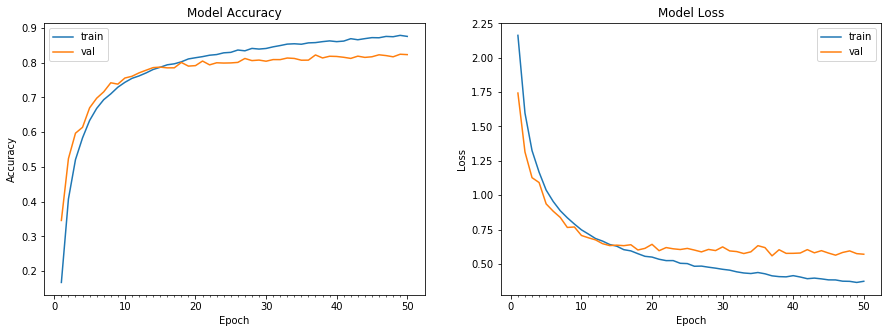

Accuracy on test data is: 82.33


In [42]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [48]:
# Defining my model 0.8261

model_2 = Sequential()

model_2.add(SeparableConv2D(32, kernel_size=(3, 3), depth_multiplier=1,input_shape=(32, 32, 3))) # Output Size: 30,30,32   RF: 3
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dropout(0.1))

model_2.add(SeparableConv2D(64, kernel_size=(3, 3), depth_multiplier=1))  # 28,28,64 RF: 5
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dropout(0.1))

model_2.add(SeparableConv2D(128, kernel_size=(3, 3),  depth_multiplier=1))  # 26,26,128
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dropout(0.1))

model_2.add(SeparableConv2D(256, kernel_size=(3, 3),  depth_multiplier=1))  # 24,24,128
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dropout(0.1))


model_2.add(MaxPooling2D(pool_size=(2, 2))) # 12,12,128

model_2.add(SeparableConv2D(32, kernel_size=(3, 3),  depth_multiplier=1))  # 10,10,32 
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dropout(0.1))


model_2.add(SeparableConv2D(64, kernel_size=(3, 3),  depth_multiplier=1))  # 8,8,64
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dropout(0.1))


model_2.add(SeparableConv2D(128, kernel_size=(3, 3),  depth_multiplier=1))  # 6,6,32 
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dropout(0.1))


model_2.add(MaxPooling2D(pool_size=(2, 2))) # 3,3,

model_2.add(SeparableConv2D(10, kernel_size=(3, 3)))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dropout(0.1))



model_2.add(Flatten())
model_2.add(Dense(num_classes, activation='softmax'))

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()



Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_79 (Separab (None, 30, 30, 32)        155       
_________________________________________________________________
batch_normalization_16 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_33 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
separable_conv2d_80 (Separab (None, 28, 28, 64)        2400      
_________________________________________________________________
batch_normalization_17 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
activation_34 (Activation)   (None, 28, 28, 64)      

In [46]:
# train the model
start = time.time()
# Train the model
model_info = model_2.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_2))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  """


Epoch 1/50
390/390 [==============================] - 48s 122ms/step - loss: 1.9473 - acc: 0.2845 - val_loss: 1.8936 - val_acc: 0.3331
Epoch 2/50
390/390 [==============================] - 45s 115ms/step - loss: 1.5306 - acc: 0.4449 - val_loss: 1.5300 - val_acc: 0.4536
Epoch 3/50
390/390 [==============================] - 45s 115ms/step - loss: 1.3302 - acc: 0.5167 - val_loss: 1.3224 - val_acc: 0.5284
Epoch 4/50
390/390 [==============================] - 45s 115ms/step - loss: 1.2224 - acc: 0.5595 - val_loss: 1.2091 - val_acc: 0.5709
Epoch 5/50
390/390 [==============================] - 45s 115ms/step - loss: 1.1549 - acc: 0.5853 - val_loss: 1.2361 - val_acc: 0.5809
Epoch 6/50
390/390 [==============================] - 45s 114ms/step - loss: 1.0977 - acc: 0.6073 - val_loss: 1.3683 - val_acc: 0.5138
Epoch 7/50
390/390 [==============================] - 45s 116ms/step - loss: 1.0617 - acc: 0.6206 - val_loss: 1.1573 - val_acc: 0.5922
Epoch 8/50
390/390 [==============================] - 4

KeyboardInterrupt: ignored